<a href="https://colab.research.google.com/github/vthamada/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

#🔧 Transformação

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
dados_customer = pd.json_normalize(dados['customer'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

dados_final = pd.concat(
    [dados[['customerID', 'Churn']], dados_customer, dados_phone, dados_internet, dados_account], axis=1
)

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
dados_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
dados_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
dados_final.duplicated().sum()

np.int64(0)

In [ ]:
colunas_categoricas = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} → {valores_unicos} \n")

Coluna: Churn → ['No' 'Yes' ''] 

Coluna: gender → ['Female' 'Male'] 

Coluna: Partner → ['Yes' 'No'] 

Coluna: Dependents → ['Yes' 'No'] 

Coluna: PhoneService → ['Yes' 'No'] 

Coluna: MultipleLines → ['No' 'Yes' 'No phone service'] 

Coluna: InternetService → ['DSL' 'Fiber optic' 'No'] 

Coluna: OnlineSecurity → ['No' 'Yes' 'No internet service'] 

Coluna: OnlineBackup → ['Yes' 'No' 'No internet service'] 

Coluna: DeviceProtection → ['No' 'Yes' 'No internet service'] 

Coluna: TechSupport → ['Yes' 'No' 'No internet service'] 

Coluna: StreamingTV → ['Yes' 'No' 'No internet service'] 

Coluna: StreamingMovies → ['No' 'Yes' 'No internet service'] 

Coluna: Contract → ['One year' 'Month-to-month' 'Two year'] 

Coluna: PaperlessBilling → ['Yes' 'No'] 

Coluna: PaymentMethod → ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] 



In [ ]:
for col in colunas_categoricas:
    qtd_vazios = (dados_final[col] == '').sum()
    if qtd_vazios > 0:
        print(f"Coluna '{col}' possui {qtd_vazios} valores vazios.")

Coluna 'Churn' possui 224 valores vazios.


In [ ]:
dados_final['Charges.Total'] = dados_final['Charges.Total'].str.strip()

valores_vazios_charge = (dados_final['Charges.Total'] == '').sum()
print(f"Quantidade de valores vazios na coluna 'Charges.Total': {valores_vazios_charge}")

Quantidade de valores vazios na coluna 'Charges.Total': 11


In [ ]:
dados_final[dados_final['Charges.Total'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
dados_final['Charges.Total'] = (dados_final['Charges.Total'].str.strip().replace('', 0).astype(float))

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
dados_final[dados_final['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [ ]:
dados_final['MultipleLines'] = dados_final['MultipleLines'].replace('No phone service', 'No')

In [ ]:
colunas_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in colunas_internet:
    dados_final[col] = dados_final[col].replace('No internet service', 'No')

In [ ]:
# Eliminar registros sem valor definido em Churn
dados_final = dados_final[dados_final['Churn'] != '']

In [ ]:
for col in colunas_categoricas:
    dados_final[col] = dados_final[col].str.strip().str.lower()

In [ ]:
for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} → {valores_unicos} \n")

Coluna: Churn → ['no' 'yes'] 

Coluna: gender → ['female' 'male'] 

Coluna: Partner → ['yes' 'no'] 

Coluna: Dependents → ['yes' 'no'] 

Coluna: PhoneService → ['yes' 'no'] 

Coluna: MultipleLines → ['no' 'yes'] 

Coluna: InternetService → ['dsl' 'fiber optic' 'no'] 

Coluna: OnlineSecurity → ['no' 'yes'] 

Coluna: OnlineBackup → ['yes' 'no'] 

Coluna: DeviceProtection → ['no' 'yes'] 

Coluna: TechSupport → ['yes' 'no'] 

Coluna: StreamingTV → ['yes' 'no'] 

Coluna: StreamingMovies → ['no' 'yes'] 

Coluna: Contract → ['one year' 'month-to-month' 'two year'] 

Coluna: PaperlessBilling → ['yes' 'no'] 

Coluna: PaymentMethod → ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)'] 



In [ ]:
dados_final['Contas_Diarias'] = (dados_final['Charges.Monthly'] / 30).round(2)

In [ ]:
# Colunas binárias com "Yes"/"No"
colunas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

# Mapear valores para 1/0
for col in colunas_binarias:
    dados_final[col] = dados_final[col].replace({'yes': 1, 'no': 0})

<ipython-input-24-0b6214fddd3c>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_final[col] = dados_final[col].replace({'yes': 1, 'no': 0})


In [ ]:
dados_final.rename(columns={
    'Churn': 'evadiu',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'tem_parceiro',
    'Dependents': 'tem_dependentes',
    'tenure': 'tempo_meses',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_online',
    'PaymentMethod': 'forma_pagamento',
    'Charges.Monthly': 'conta_mensal',
    'Charges.Total': 'conta_total',
    'Contas_Diarias': 'conta_diaria'
}, inplace=True)

In [ ]:
dados_final.head()

,customerID,evadiu,genero,idoso,tem_parceiro,tem_dependentes,tempo_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,conta_mensal,conta_total,conta_diaria
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.80


In [ ]:
colunas_categoricas = [
    'evadiu', 'genero', 'idoso', 'tem_dependentes', 'servico_telefone', 'multiplas_linhas',
    'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'tipo_contrato',
    'fatura_online', 'forma_pagamento'
]

for col in colunas_categoricas:
    valores_unicos = dados_final[col].unique()
    print(f"Coluna: {col} → {valores_unicos} \n")

Coluna: evadiu → [0 1] 

Coluna: genero → ['female' 'male'] 

Coluna: idoso → [0 1] 

Coluna: tem_dependentes → [1 0] 

Coluna: servico_telefone → [1 0] 

Coluna: multiplas_linhas → [0 1] 

Coluna: tipo_internet → ['dsl' 'fiber optic' 'no'] 

Coluna: seguranca_online → [0 1] 

Coluna: backup_online → [1 0] 

Coluna: protecao_dispositivo → [0 1] 

Coluna: suporte_tecnico → [1 0] 

Coluna: tv_streaming → [1 0] 

Coluna: filmes_streaming → [0 1] 

Coluna: tipo_contrato → ['one year' 'month-to-month' 'two year'] 

Coluna: fatura_online → [1 0] 

Coluna: forma_pagamento → ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)'] 



In [ ]:
dados_final['genero'] = dados_final['genero'].replace({
    'female': 'feminino',
    'male': 'masculino'
})

dados_final['tipo_internet'] = dados_final['tipo_internet'].replace({
    'fiber optic': 'fibra óptica',
    'no': 'não'
})

dados_final['tipo_contrato'] = dados_final['tipo_contrato'].replace({
    'month-to-month': 'mensal',
    'one year': 'anual',
    'two year': 'bienal'
})

dados_final['forma_pagamento'] = dados_final['forma_pagamento'].replace({
    'mailed check': 'boleto',
    'electronic check': 'débito online',
    'credit card (automatic)': 'cartão (automático)',
    'bank transfer (automatic)': 'transferência (automática)'
})

In [ ]:
dados_final.head()

,customerID,evadiu,genero,idoso,tem_parceiro,tem_dependentes,tempo_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,forma_pagamento,conta_mensal,conta_total,conta_diaria
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,0,1,1,0,anual,1,boleto,65.6,593.30,2.19
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,0,1,mensal,0,boleto,59.9,542.40,2.00
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra óptica,...,1,0,0,0,mensal,1,débito online,73.9,280.85,2.46
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra óptica,...,1,0,1,1,mensal,1,débito online,98.0,1237.85,3.27
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra óptica,...,0,1,1,0,mensal,1,boleto,83.9,267.40,2.80


#📊 Carga e análise

In [ ]:
dados_final[['tempo_meses', 'conta_mensal', 'conta_total', 'conta_diaria']].describe()

,tempo_meses,conta_mensal,conta_total,conta_diaria
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [ ]:
# Contagem absoluta
dados_final['evadiu'].value_counts()

,count
evadiu,
0,5174
1,1869


In [ ]:
# Contagem percentual
dados_final['evadiu'].value_counts(normalize=True) * 100

,proportion
evadiu,
0,73.463013
1,26.536987


<ipython-input-33-731f76985f47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dados_final, x='evadiu', palette='tab10')


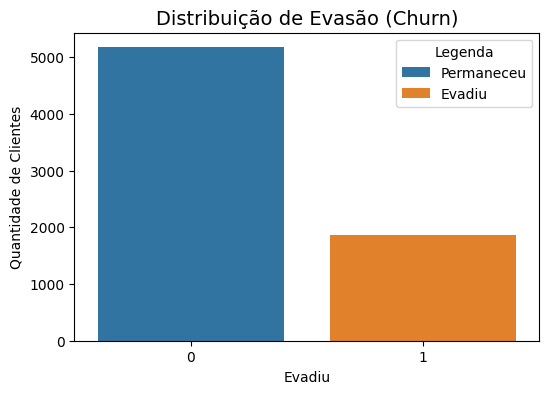

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria o gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dados_final, x='evadiu', palette='tab10')

# Adiciona título e rótulos
plt.title('Distribuição de Evasão (Churn)', fontsize=14)
plt.xlabel('Evadiu')
plt.ylabel('Quantidade de Clientes')

# Adiciona a legenda personalizada
plt.legend(handles=ax.patches, labels=['Permaneceu', 'Evadiu'], title='Legenda')

plt.show()

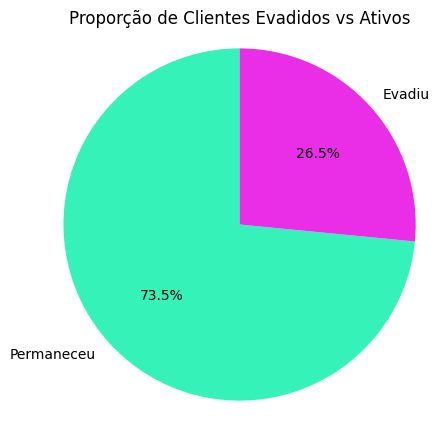

In [ ]:
# Dados de proporção
labels = ['Permaneceu', 'Evadiu']
sizes = dados_final['evadiu'].value_counts().sort_index()
colors = ['#35f2b9','#ea2ee7']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporção de Clientes Evadidos vs Ativos')
plt.axis('equal')
plt.show()

In [ ]:
variaveis_categoricas = [
    'genero', 'tipo_contrato', 'forma_pagamento', 'tipo_internet',
    'servico_telefone', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming',
    'tem_dependentes', 'idoso', 'tem_parceiro', 'fatura_online'
]

In [ ]:
for var in variaveis_categoricas:
    print(f"\nTaxa de evasão por categoria: {var}")
    tabela = pd.crosstab(dados_final[var], dados_final['evadiu'], normalize='index') * 100
    tabela.columns = ['Permaneceu (%)', 'Evadiu (%)']
    display(tabela.sort_values('Evadiu (%)', ascending=False).style.format("{:.1f}"))
    print("\n")


Taxa de evasão por categoria: genero


,Permaneceu (%),Evadiu (%)
genero,,
feminino,73.1,26.9
masculino,73.8,26.2





Taxa de evasão por categoria: tipo_contrato


,Permaneceu (%),Evadiu (%)
tipo_contrato,,
mensal,57.3,42.7
anual,88.7,11.3
bienal,97.2,2.8





Taxa de evasão por categoria: forma_pagamento


,Permaneceu (%),Evadiu (%)
forma_pagamento,,
débito online,54.7,45.3
boleto,80.9,19.1
transferência (automática),83.3,16.7
cartão (automático),84.8,15.2





Taxa de evasão por categoria: tipo_internet


,Permaneceu (%),Evadiu (%)
tipo_internet,,
fibra óptica,58.1,41.9
dsl,81.0,19.0
não,92.6,7.4





Taxa de evasão por categoria: servico_telefone


,Permaneceu (%),Evadiu (%)
servico_telefone,,
1,73.3,26.7
0,75.1,24.9





Taxa de evasão por categoria: suporte_tecnico


,Permaneceu (%),Evadiu (%)
suporte_tecnico,,
0,68.8,31.2
1,84.8,15.2





Taxa de evasão por categoria: tv_streaming


,Permaneceu (%),Evadiu (%)
tv_streaming,,
1,69.9,30.1
0,75.7,24.3





Taxa de evasão por categoria: filmes_streaming


,Permaneceu (%),Evadiu (%)
filmes_streaming,,
1,70.1,29.9
0,75.6,24.4





Taxa de evasão por categoria: tem_dependentes


,Permaneceu (%),Evadiu (%)
tem_dependentes,,
0,68.7,31.3
1,84.5,15.5





Taxa de evasão por categoria: idoso


,Permaneceu (%),Evadiu (%)
idoso,,
1,58.3,41.7
0,76.4,23.6





Taxa de evasão por categoria: tem_parceiro


,Permaneceu (%),Evadiu (%)
tem_parceiro,,
0,67.0,33.0
1,80.3,19.7





Taxa de evasão por categoria: fatura_online


,Permaneceu (%),Evadiu (%)
fatura_online,,
1,66.4,33.6
0,83.7,16.3


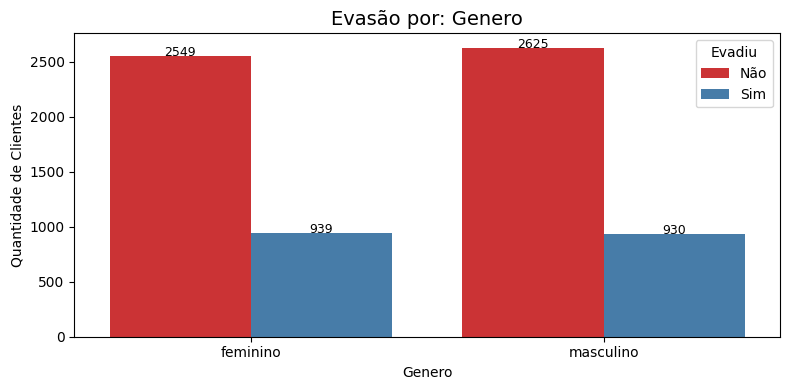

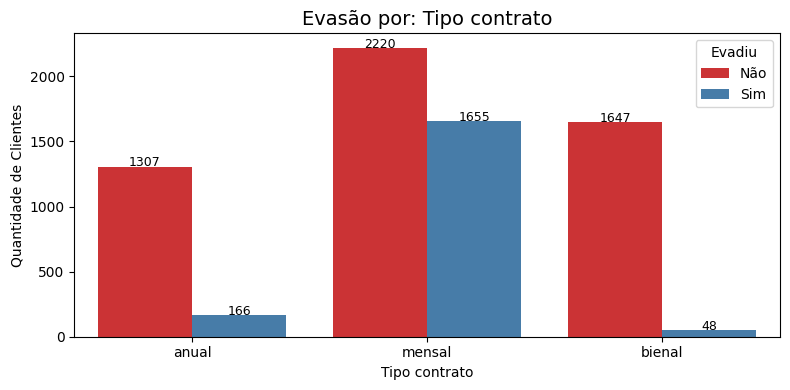

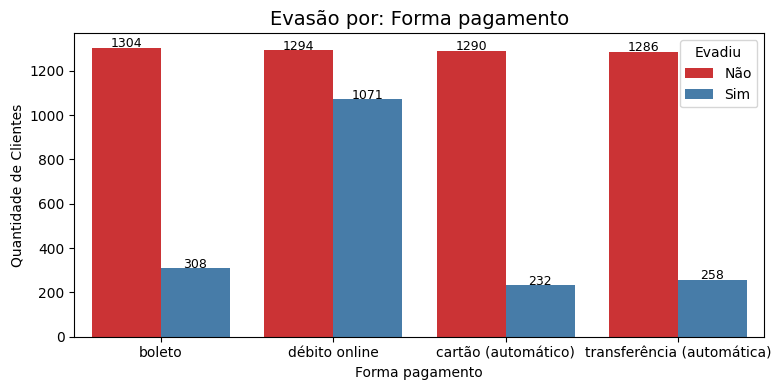

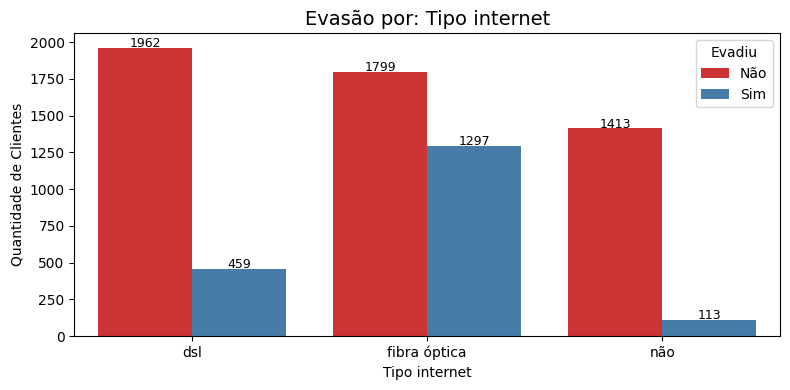

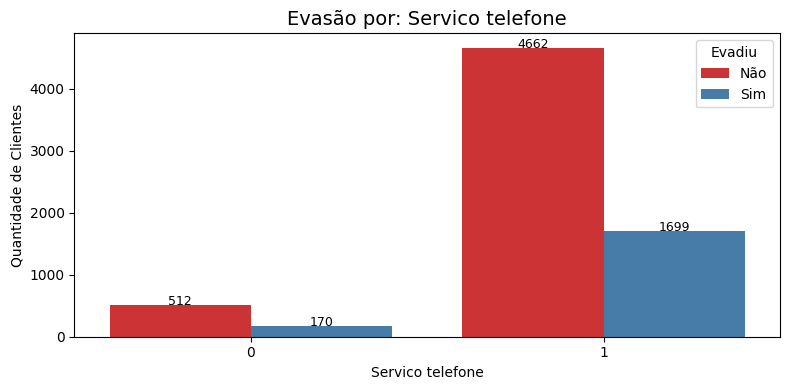

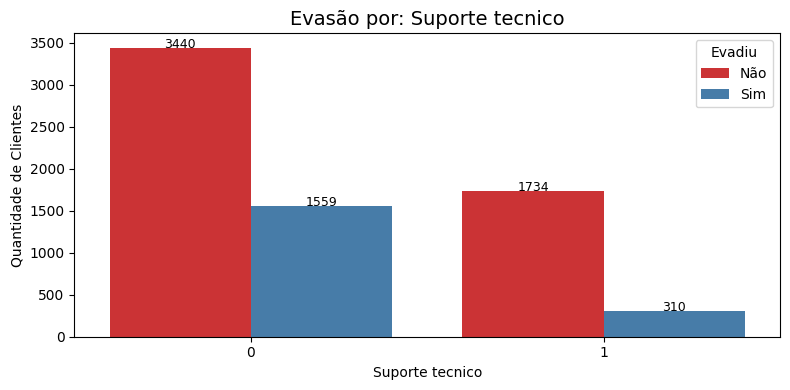

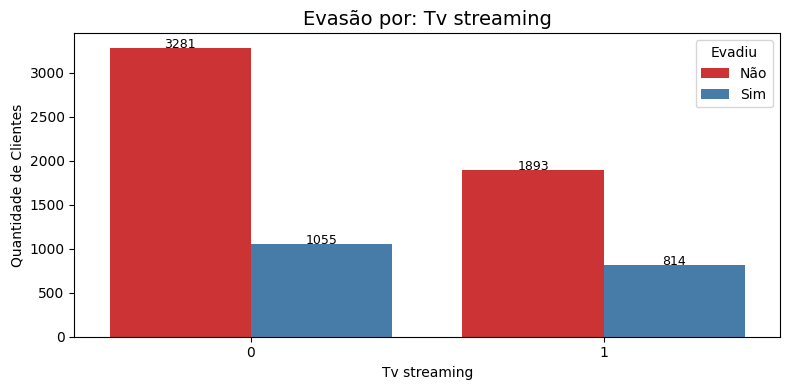

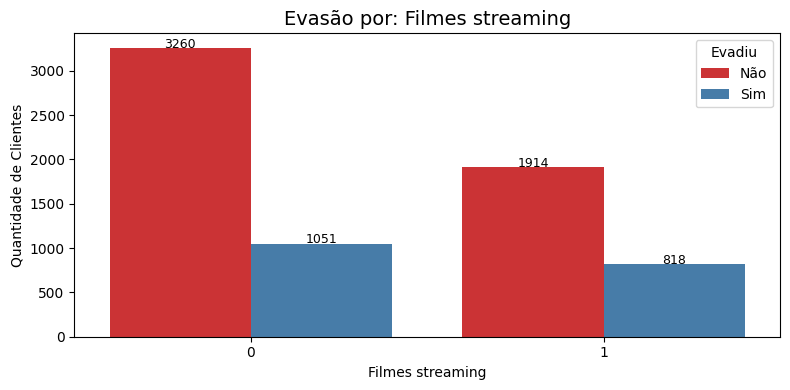

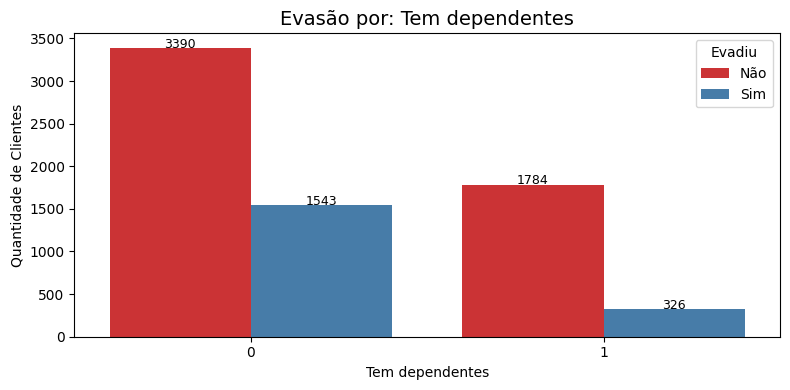

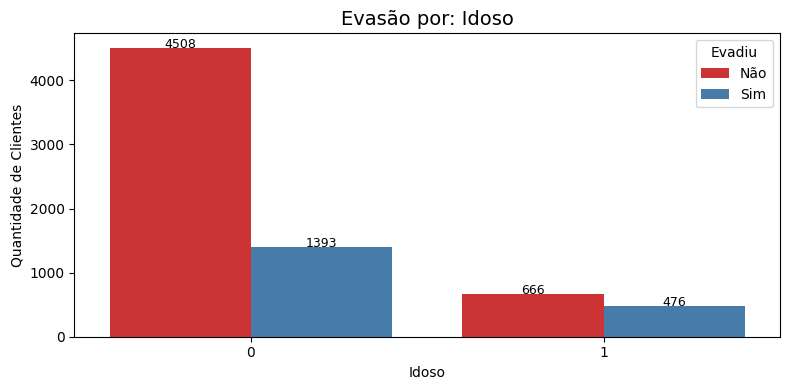

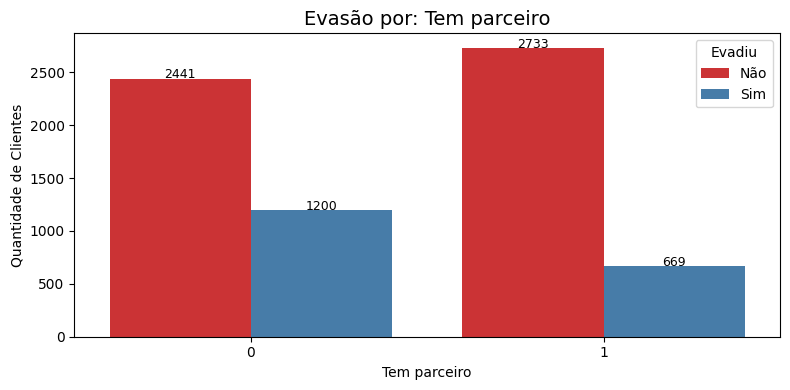

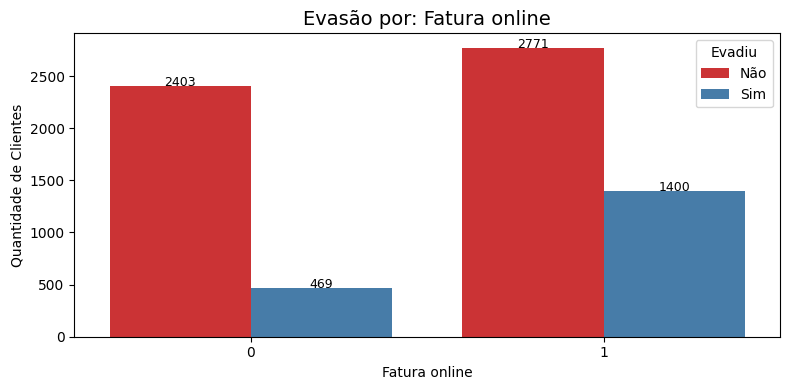

In [ ]:
for var in variaveis_categoricas:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=dados_final, x=var, hue='evadiu', palette='Set1')

    titulo = var.replace("_", " ").capitalize()

    plt.title(f'Evasão por: {titulo}', fontsize=14)
    plt.xlabel(titulo)
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Evadiu', labels=['Não', 'Sim'])

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height + 2),
                        ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()
    print("\n")

In [ ]:
ranking = []

for var in variaveis_categoricas:
    tabela = pd.crosstab(dados_final[var], dados_final['evadiu'], normalize='index') * 100
    if 1 in tabela.columns:
        max_churn = tabela[1].max()
        categoria_max = tabela[1].idxmax()
        ranking.append((var, categoria_max, round(max_churn, 1)))

ranking_df = pd.DataFrame(ranking, columns=['Variável', 'Categoria com maior evasão', 'Evasão (%)'])
display(ranking_df.sort_values('Evasão (%)', ascending=False))

,Variável,Categoria com maior evasão,Evasão (%)
2,forma_pagamento,débito online,45.3
1,tipo_contrato,mensal,42.7
3,tipo_internet,fibra óptica,41.9
9,idoso,1,41.7
11,fatura_online,1,33.6
10,tem_parceiro,0,33.0
8,tem_dependentes,0,31.3
5,suporte_tecnico,0,31.2
6,tv_streaming,1,30.1
7,filmes_streaming,1,29.9


In [ ]:
dados_final.groupby('evadiu')[['conta_total', 'conta_mensal', 'tempo_meses', 'conta_diaria']].mean()

,conta_total,conta_mensal,tempo_meses,conta_diaria
evadiu,,,,
0,2549.911442,61.265124,37.569965,2.04208
1,1531.796094,74.441332,17.979133,2.48145


In [ ]:
variaveis_numericas = ['tempo_meses', 'conta_total', 'conta_mensal', 'conta_diaria']

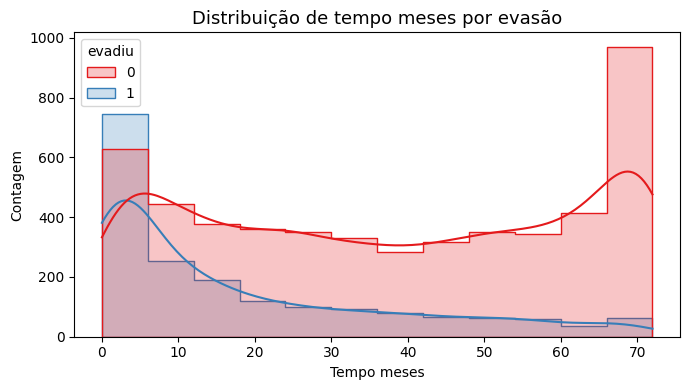

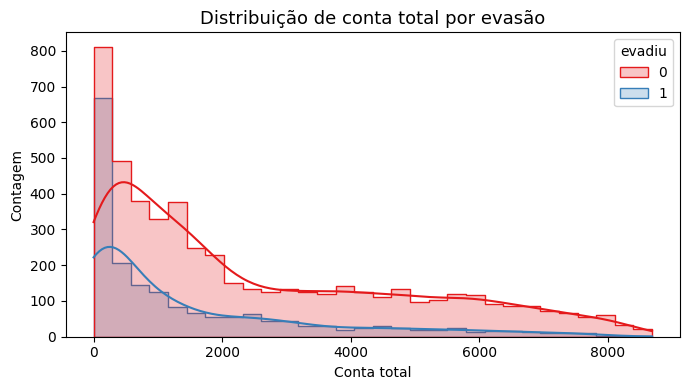

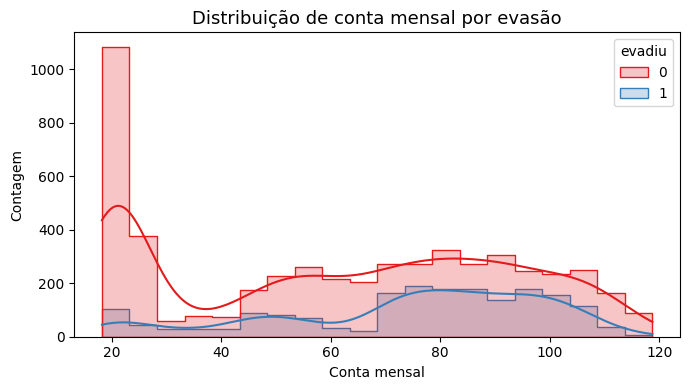

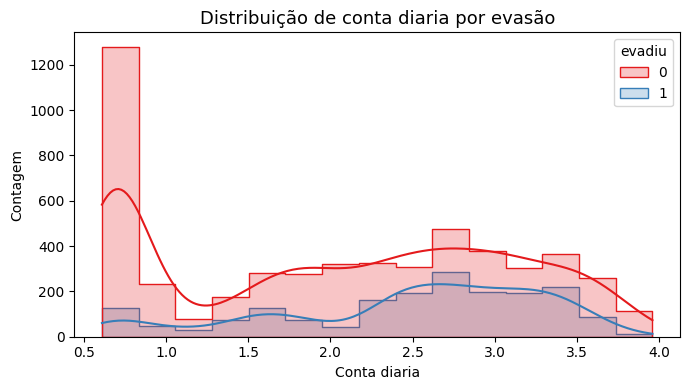

In [ ]:
bins_dict = {
    'tempo_meses': 12,
    'conta_total': 30,
    'conta_mensal': 20,
    'conta_diaria': 15
}

for var in variaveis_numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=dados_final, x=var, hue='evadiu', bins=bins_dict[var], kde=True, element='step', palette='Set1')
    plt.title(f'Distribuição de {var.replace("_", " ")} por evasão', fontsize=13)
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()
    print("\n")

# 📊 Extra: Análise de Correlação entre Variáveis

In [ ]:
variaveis_numericas = ['tempo_meses', 'conta_total', 'conta_mensal', 'conta_diaria', 'evadiu']

matriz_corr = dados_final[variaveis_numericas].corr()

print(matriz_corr['evadiu'].sort_values(ascending=False))

evadiu          1.000000
conta_diaria    0.193412
conta_mensal    0.193356
conta_total    -0.198324
tempo_meses    -0.352229
Name: evadiu, dtype: float64


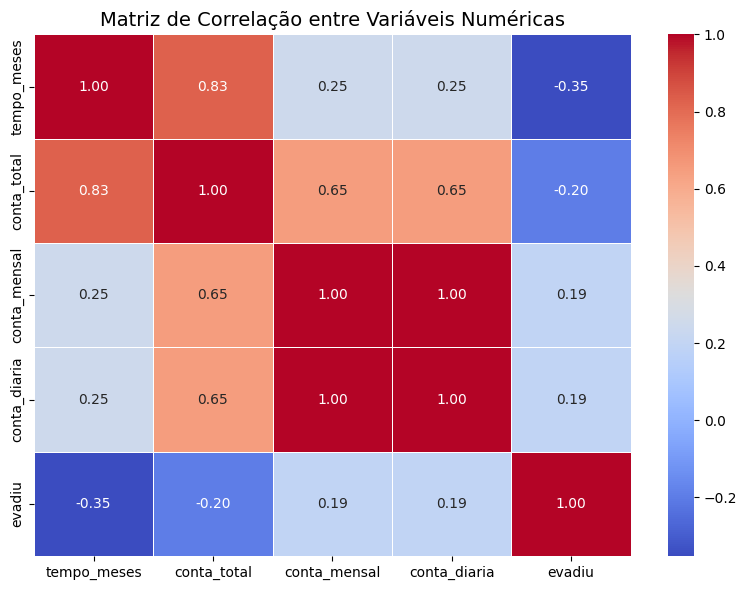

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
colunas_servicos = [
    'servico_telefone', 'multiplas_linhas', 'tipo_internet',
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'tv_streaming', 'filmes_streaming'
]

In [ ]:
# Converter 'tipo_internet' para binário, já que não era numérica
dados_final['tem_internet'] = dados_final['tipo_internet'].apply(lambda x: 0 if x == 'no' else 1)

# Criar uma nova coluna com a soma de serviços por cliente
dados_final['qtd_servicos'] = (
    dados_final[['servico_telefone', 'multiplas_linhas',
                 'seguranca_online', 'backup_online',
                 'protecao_dispositivo', 'suporte_tecnico',
                 'tv_streaming', 'filmes_streaming', 'tem_internet']]
    .sum(axis=1)
)

# Ver a média de serviços por grupo de evasão
media_servicos_por_evasao = dados_final.groupby('evadiu')['qtd_servicos'].mean()

print(media_servicos_por_evasao)

evadiu
0    4.446270
1    4.132156
Name: qtd_servicos, dtype: float64


In [ ]:
media_formatada = media_servicos_por_evasao.rename(index={0: 'Permaneceram', 1: 'Evadiram'})
display(media_formatada.to_frame(name='Média de Serviços Contratados'))

,Média de Serviços Contratados
evadiu,
Permaneceram,4.446270
Evadiram,4.132156


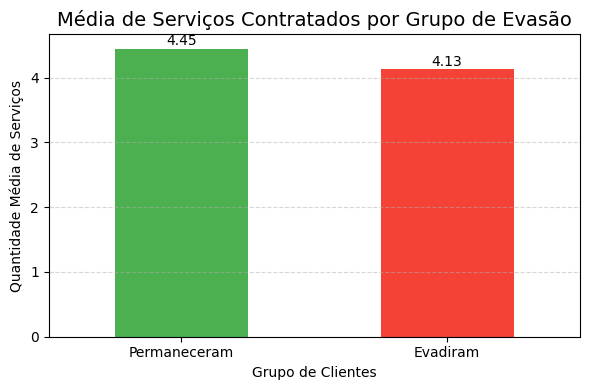

In [ ]:
plt.figure(figsize=(6,4))
media_formatada.plot(kind='bar', color=['#4CAF50', '#F44336'])
plt.title('Média de Serviços Contratados por Grupo de Evasão', fontsize=14)
plt.ylabel('Quantidade Média de Serviços')
plt.xlabel('Grupo de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(media_formatada):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#📄Relatorio Final



# 📊 Relatório Final - Análise de Evasão de Clientes (Churn) - Telecom X

## 🔍 Introdução

A Telecom X está enfrentando um problema crítico relacionado à evasão de clientes (*churn*). Para entender os fatores que influenciam os cancelamentos e subsidiar estratégias de retenção, foi realizada uma análise completa dos dados de clientes, contemplando extração, transformação, análise exploratória e correlações.

---

## 🗂️ Extração e Estrutura Inicial dos Dados

- Os dados foram extraídos de uma URL pública no formato `.json`.
- O dataset possuía colunas aninhadas com informações detalhadas dos clientes.
- Total de registros: **7267 clientes** com 6 colunas principais, sendo que 4 continham dados em formato de dicionário.

---

## 🧹 Limpeza e Transformação dos Dados

### 🔄 Normalização

- As colunas `customer`, `phone`, `internet`, `account` foram normalizadas com `pd.json_normalize`.
- As colunas normalizadas foram concatenadas com `customerID` e `Churn`.

### ❗ Tratamento de Dados Faltantes e Inconsistências

- Valores vazios identificados em `Churn` (224) e `Charges.Total` (11).
- `Charges.Total` possuía espaços em branco, tratados com `.str.strip()`.
- Campos vazios em `Charges.Total` foram convertidos para `0`.
- Registros com `Churn` nulo foram removidos da base.

### 🧭 Padronização e Conversões

- Todas as colunas categóricas foram convertidas para `lowercase`.
- Valores como `"no internet service"` foram tratados como `"no"` para padronização.
- Colunas categóricas binárias foram convertidas em **0 e 1** (ex: `yes → 1`, `no → 0`).
- Colunas renomeadas para o português (ex: `gender → genero`, `Contract → tipo_contrato`).

---

## 🆕 Criação de Novas Variáveis

- `conta_diaria` = `conta_mensal` / 30
- `tem_internet`: variável binária derivada de `tipo_internet`
- `qtd_serviços`: soma total dos serviços contratados por cliente

---

## 📈 Análise Descritiva

Foi aplicado `.describe()` para variáveis numéricas:

- `tempo_meses` varia de 0 a 72 meses (média de ~32 meses)
- `conta_total` e `conta_mensal` possuem distribuição assimétrica
- `conta_diaria`: média ~2.15

---

## 📊 Distribuição da Evasão

- Proporção de churn:
  - **73%** dos clientes permaneceram
  - **27%** evadiram
- Gráfico de barras com legenda (`0 = permaneceu`, `1 = evadiu`)

---

## 📋 Análise Categórica por Evasão

### 🔎 Variáveis Avaliadas

- `genero`, `tipo_contrato`, `forma_pagamento`, `fatura_online`, `tv_streaming`, entre outras

### 🧠 Resultados Relevantes

- **Contrato mensal** → maior taxa de churn
- **Cheque eletrônico** → método com maior evasão
- **Fatura online** → mais propensa à evasão que fatura física
- Menor quantidade de serviços contratados → maior churn

Além disso:

- Utilizado `pd.crosstab()` para cruzamento e ranking das categorias com maior churn

---

## 📉 Análise Numérica por Evasão

### 📌 Variáveis Avaliadas

- `tempo_meses`, `conta_total`, `conta_mensal`, `conta_diaria`

### 📊 Visualizações

- Histogramas com `kde`
- Gráficos de barras com média das variáveis por evasão

### 📌 Observações

- Clientes com **menor tempo de contrato** → maior churn
- Pequenas diferenças em `conta_total` e `conta_diaria` entre evadidos e não evadidos

---

## 🔁 Correlações (Extra)

### Correlação com `evadiu`

| Variável         | Correlação |
|------------------|------------|
| tempo_meses      | -0.35      |
| conta_total      | -0.20      |
| conta_mensal     |  0.19      |
| conta_diaria     |  0.19      |

### 📌 Quantidade de Serviços Contratados

- Média de **4.44** serviços entre clientes que **não evadiram**
- Média de **4.13** entre clientes que **evadiram**

---

## ✅ Conclusões e Insights

- **Tempo de permanência** é o maior preditor de churn
- **Contratos mensais** aumentam a evasão
- **Clientes com menos serviços contratados** têm maior propensão a cancelar
- Formas de pagamento automáticas (ex: débito em conta) têm **menor evasão**

---

## 💡 Recomendações Estratégicas

- Incentivar **contratos de longo prazo** com benefícios progressivos
- Estimular **pagamentos automáticos**
- Criar campanhas de retenção para **clientes novos com poucos serviços**
- Desenvolver um **modelo preditivo de churn** usando `tempo_meses`, `qtd_serviços`, `tipo_contrato`, `forma_pagamento`, etc.